## Installation of Run Time Libraries


In [4]:
# These are the dependencies required for creating an environment
!apt install cmake libopenmpi-dev zlib1g-dev
!pip install stable-baselines==2.2.0
!apt-get install python-opengl


Reading package lists... Done
Building dependency tree       
Reading state information... Done
zlib1g-dev is already the newest version (1:1.2.11.dfsg-0ubuntu2).
zlib1g-dev set to manually installed.
The following additional packages will be installed:
  autotools-dev cmake-data file ibverbs-providers libarchive13 libfabric1
  libhwloc-dev libhwloc-plugins libhwloc5 libibverbs-dev libibverbs1
  libjsoncpp1 libltdl-dev libltdl7 liblzo2-2 libmagic-mgc libmagic1
  libnl-3-200 libnl-route-3-200 libnuma-dev libnuma1 libopenmpi2 libpciaccess0
  libpsm-infinipath1 librdmacm1 librhash0 libtool libuv1 ocl-icd-libopencl1
  openmpi-bin openmpi-common
Suggested packages:
  cmake-doc ninja-build lrzip libhwloc-contrib-plugins libtool-doc openmpi-doc
  pciutils autoconf automaken gcj-jdk
The following NEW packages will be installed:
  autotools-dev cmake cmake-data file ibverbs-providers libarchive13
  libfabric1 libhwloc-dev libhwloc-plugins libhwloc5 libibverbs-dev
  libibverbs1 libjsoncpp1 liblt

# Training the Model


In [5]:
# Create and wrap the environment
from stable_baselines.common.atari_wrappers import make_atari
from stable_baselines.deepq.policies import MlpPolicy, CnnPolicy
from stable_baselines import DQN

# Make Pong Environment
env = make_atari('PongNoFrameskip-v4')
# using the Deep-Q Learning with CNN Policy 
model = DQN(CnnPolicy, env, verbose=1)
# Train the agent
model.learn(total_timesteps=1000)

/usr/local/lib/python3.6/dist-packages/gym/envs/registration.py:14: PkgResourcesDeprecationWarning: Parameters to load are deprecated.  Call .resolve and .require separately.
  result = entry_point.load(False)


# Testing on Pong Environment


In [6]:
R=0
frames=[]
plot_rewards=[]
obs = env.reset() #initializing STATE
for episode in range(0,2000):
    action, _states = model.predict(obs)# feeding state to model to predict next state and action
    obs, rewards, dones, info = env.step(action) #getting game data
    R+=rewards #summing rewards for episode
    if (dones): # episode over
      print('Last Episode Reward: {}'.format(R))
      plot_rewards.append(R)
      R=0
      obs=env.reset() #starting game again
    fig=env.render(mode = 'rgb_array') # rendering env
    frames.append(fig)
print(plot_rewards)

Last Episode Reward: -21.0
Last Episode Reward: -21.0
[-21.0, -21.0]


In [7]:
"""

To create animation, you need to install ffmpeg
These lines will install it in Google Colab
If you're running this notebook locally, you'll need to install
ffmpeg on your computer: 
https://github.com/adaptlearning/adapt_authoring/wiki/Installing-FFmpeg

"""
!apt install ffmpeg
!which ffmpeg
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.image import imread
from matplotlib import rc, animation
from IPython import display
from IPython.display import HTML
%matplotlib inline
plt.rcParams['animation.ffmpeg_path'] = u'/usr/bin/ffmpeg'

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  fontconfig i965-va-driver libaacs0 libasound2 libasound2-data libass9
  libasyncns0 libavc1394-0 libavcodec57 libavdevice57 libavfilter6
  libavformat57 libavresample3 libavutil55 libbdplus0 libbluray2 libbs2b0
  libcaca0 libcairo2 libcdio-cdda2 libcdio-paranoia2 libcdio17 libchromaprint1
  libcroco3 libcrystalhd3 libdatrie1 libdc1394-22 libfftw3-double3 libflac8
  libflite1 libfribidi0 libgdk-pixbuf2.0-0 libgdk-pixbuf2.0-bin
  libgdk-pixbuf2.0-common libgme0 libgsm1 libiec61883-0 libjack-jackd2-0
  libjbig0 libmp3lame0 libmpg123-0 libmysofa0 libogg0 libopenal-data
  libopenal1 libopenjp2-7 libopenmpt0 libopus0 libpango-1.0-0
  libpangocairo-1.0-0 libpangoft2-1.0-0 libpixman-1-0 libpostproc54 libpulse0
  libraw1394-11 librsvg2-2 librsvg2-common librubberband2 libsamplerate0
  libsdl2-2.0-0 libshine3 libslang2 libsnappy1v5 libsndfile1 lib

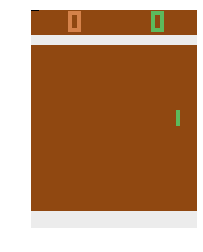

In [8]:
# Saving Animation
fig, ax = plt.subplots()
plt.axis('off')
l = ax.imshow(frames[0])

def animate(i):
    l.set_data(frames[i])

Writer = animation.writers['ffmpeg']
writer = Writer(fps=12, metadata=dict(artist='Me'))
ani = animation.FuncAnimation(fig, animate, frames=len(frames))

ani.save('pong.mp4', writer=writer, dpi=220)

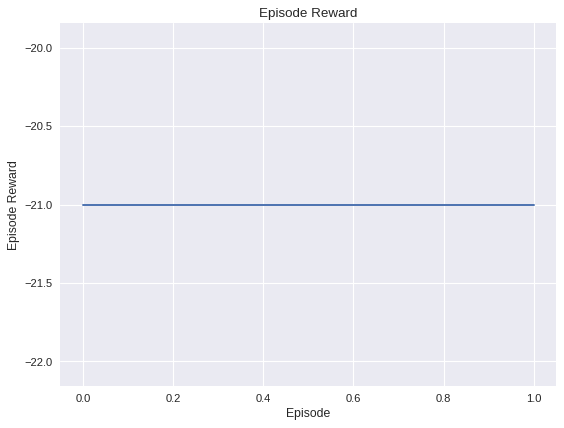

In [9]:
# Plotting rewards graph
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6), dpi=80)
plt.title("Episode Reward")
plt.xlabel("Episode")
plt.ylabel("Episode Reward")
plt.plot(plot_rewards)

In [0]:
try:
  from google.colab import files
except:
  print("Could not import Google Colab.")
  
files.download('pong.mp4')